<a href="https://colab.research.google.com/github/amandassa/ciencia-de-dados-aulas/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports de Bibliotecas

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Base de Dados

In [3]:
caso1 = { 'preco': [38, 42, 50, 56, 59, 63, 70, 80, 95, 110],
         'demanda': [350, 325, 297, 270, 256, 246, 238, 223, 215, 208]}

df_estudo_1 = pd.DataFrame(caso1)

df_estudo_1.sample()


,preco,demanda
9,110,208


In [4]:
caso2 = {'preco': [38, 42, 50, 56, 59, 63, 70, 80, 95, 110],
         'demanda': [350, 325, 297, 270, 256, 246, 238, 223, 215, 208],
         'Publicidade': [100, 120, 80, 90, 110, 95, 70, 85, 75, 60],
         'Competidores': [5, 4, 6, 3, 5, 4, 6, 3, 4, 5]}

df_estudo_2 = pd.DataFrame(caso2)

df_estudo_2.sample()


,preco,demanda,Publicidade,Competidores
2,50,297,80,6


#Estudo de Caso 1

## Gráfico de Dispersão

In [5]:
df_estudo_1

,preco,demanda
0,38,350
1,42,325
2,50,297
3,56,270
4,59,256
5,63,246
6,70,238
7,80,223
8,95,215
9,110,208


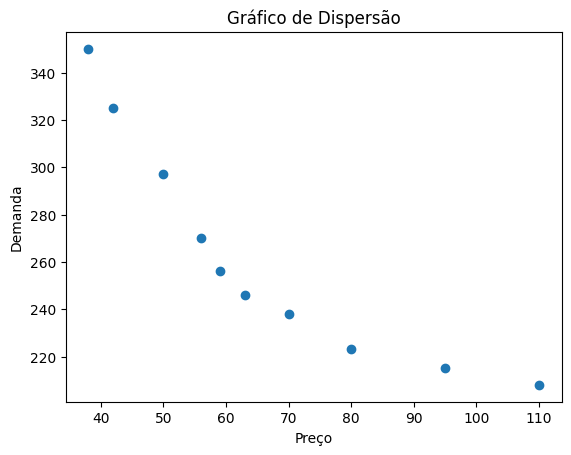

In [6]:
plt.scatter(df_estudo_1['preco'],df_estudo_1['demanda'])
plt.xlabel('Preço')
plt.ylabel('Demanda')
plt.title('Gráfico de Dispersão')
plt.show()

##Coeficiente de Correlação

O método `.corr()` retorna o valor do coeficiente de correlação entre as colunas especificadas, fornecendo uma medida da força e direção da relação entre as variáveis. Isso pode ser útil para entender a relação entre diferentes variáveis em um conjunto de dados e explorar possíveis associações.

In [7]:
coef_correlacao = df_estudo_1['preco'].corr(df_estudo_1['demanda'])

round(coef_correlacao,2)


-0.9

##Determinando a reta ajustada

A função `polyfit()` é uma função da biblioteca NumPy que realiza uma regressão polinomial em um conjunto de dados. Ela recebe como argumentos os valores de x e y e o grau do polinômio desejado. A função retorna os coeficientes do polinômio ajustado, que podem ser usados para criar uma função polinomial.
A função `poly1d()` é uma função da biblioteca NumPy que cria uma função polinomial a partir dos coeficientes fornecidos. Ela recebe como argumento os coeficientes do polinômio e retorna uma função que pode ser usada para calcular os valores do polinômio em diferentes pontos.
Essas duas funções são frequentemente usadas em conjunto para realizar uma regressão polinomial e obter uma função que representa a curva ajustada aos dados. A função `polyfit()` é usada para calcular os coeficientes do polinômio ajustado, enquanto a função `poly1d()` é usada para criar uma função polinomial a partir desses coeficientes.

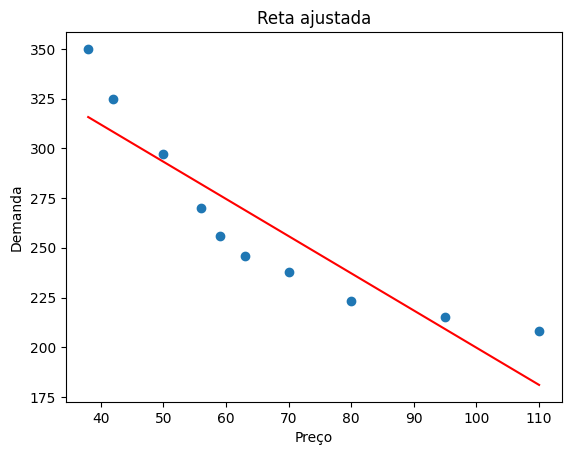

In [8]:
x = df_estudo_1['preco']
y = df_estudo_1['demanda']
coeficientes = np.polyfit(x, y, 1)
reta = np.poly1d(coeficientes)

# Plotando a curva de dispersão e a reta ajustada
plt.scatter(x, y)
plt.plot(x, reta(x), color='red')
plt.xlabel('Preço')
plt.ylabel('Demanda')
plt.title('Reta ajustada')
plt.show()

##Coeficiente de determinação R^2



In [9]:
from sklearn.metrics import r2_score


In [10]:
coeficientes = np.polyfit(x, y, 1)
reta = np.poly1d(coeficientes)

# Calculando o coeficiente de determinação
y_prev = reta(x)
r2 = r2_score(y, y_prev)

round(r2, 3)

0.813

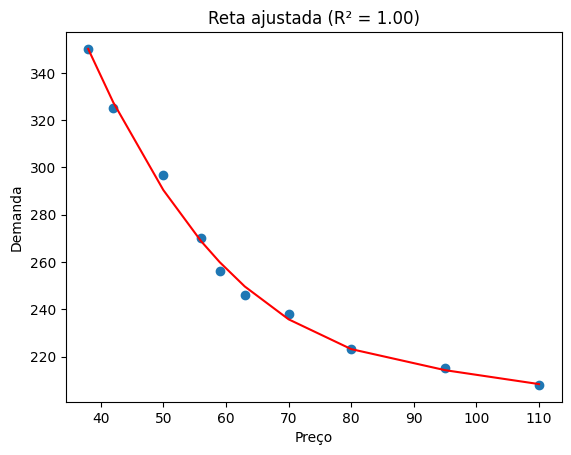

In [11]:
coeficientes = np.polyfit(x, y, 3)
reta = np.poly1d(coeficientes)

# Calculando o coeficiente de determinação
y_pred = reta(x)
r2 = r2_score(y, y_pred)

# Plotando a curva de dispersão e a reta ajustada
plt.scatter(x, y)
plt.plot(x, reta(x), color='red')
plt.xlabel('Preço')
plt.ylabel('Demanda')
plt.title('Reta ajustada (R² = {:.2f})'.format(r2))
plt.show()

##Modelo de Regressão Linear

###LinearRegression

A função `LinearRegression()` é uma classe da biblioteca scikit-learn que implementa o algoritmo de regressão linear. Essa classe permite ajustar um modelo de regressão linear aos dados, encontrar os coeficientes da reta de ajuste e fazer previsões com base nesse modelo.
A classe `LinearRegression()` possui vários métodos úteis, incluindo:
* `fit(X, y)`: Ajusta o modelo de regressão linear aos dados de treinamento, onde X é uma matriz de variáveis independentes e y é um vetor de variáveis dependentes.
* `predict(X)`: Faz previsões com base no modelo ajustado, onde X é uma matriz de variáveis independentes.
* `coef_`: Atributo que retorna os coeficientes da reta de ajuste.
* `intercept_`: Atributo que retorna o intercepto da reta de ajuste.
* `score(X, y)`: Calcula o coeficiente de determinação `(R²)` do modelo, onde X é uma matriz de variáveis independentes e y é um vetor de variáveis dependentes.

Essa função é muito útil para realizar análises de regressão linear simples ou múltipla, onde é possível ajustar uma reta aos dados e fazer previsões com base nesse modelo. Ela também fornece métricas para avaliar a qualidade do ajuste, como o coeficiente de determinação `(R²)`.

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()


Dividindo entre variável dependente e independente

In [13]:
X_demanda = df_estudo_1['preco'].values

X_demanda

array([ 38,  42,  50,  56,  59,  63,  70,  80,  95, 110])

In [14]:
X_demanda.shape

(10,)

In [15]:
y_demanda = df_estudo_1['demanda'].values
y_demanda

array([350, 325, 297, 270, 256, 246, 238, 223, 215, 208])

In [16]:
y_demanda.shape

(10,)

In [17]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_demanda, y_demanda, test_size=0.2, random_state=42)

Análise de correlações

In [18]:
np.corrcoef(X_demanda, y_demanda)

array([[ 1.        , -0.90151012],
       [-0.90151012,  1.        ]])

Regressão Linear

In [19]:
regressor.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 63  38  80  50 110  59  56  70].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

A função `reshape()` é um método da classe NumPy que permite reorganizar as dimensões de um array.

Essa operação é comumente usada em tarefas de modelagem preditiva, como **Regressão Linear**, onde é necessário ter uma matriz de recursos com uma única coluna para a variável independente.

In [20]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_train

array([[ 63],
       [ 38],
       [ 80],
       [ 50],
       [110],
       [ 59],
       [ 56],
       [ 70]])

In [21]:
reg = regressor.fit(X_train, y_train)

reg

LinearRegression()

Previsões

In [22]:
previsoes = regressor.predict(X_test)

previsoes

array([208.24420864, 303.83589897])

`.ravel()`

É usado para transformar um array multidimensional em um array unidimensional.

In [23]:
X_train = X_train.ravel()
X_test = X_test.ravel()

X_test

array([95, 42])

In [24]:
grafico = px.scatter(x = X_train, y = y_train)
grafico.add_scatter(x = X_test, y = previsoes, name = 'Regressão')
grafico.show()

In [25]:
X_demanda = X_demanda.reshape(-1,1)

df_estudo_1['previsao'] = reg.predict(X_demanda)

df_estudo_1 = df_estudo_1.round()

df_estudo_1

,preco,demanda,previsao
0,38,350,311.0
1,42,325,304.0
2,50,297,289.0
3,56,270,279.0
4,59,256,273.0
5,63,246,266.0
6,70,238,253.0
7,80,223,235.0
8,95,215,208.0
9,110,208,181.0


In [26]:
df_estudo_1['erro'] = df_estudo_1['previsao'] - df_estudo_1['demanda']

df_estudo_1

,preco,demanda,previsao,erro
0,38,350,311.0,-39.0
1,42,325,304.0,-21.0
2,50,297,289.0,-8.0
3,56,270,279.0,9.0
4,59,256,273.0,17.0
5,63,246,266.0,20.0
6,70,238,253.0,15.0
7,80,223,235.0,12.0
8,95,215,208.0,-7.0
9,110,208,181.0,-27.0


In [27]:
df_estudo_1['erro'] = abs(df_estudo_1['previsao'] - df_estudo_1['demanda'])

df_estudo_1

,preco,demanda,previsao,erro
0,38,350,311.0,39.0
1,42,325,304.0,21.0
2,50,297,289.0,8.0
3,56,270,279.0,9.0
4,59,256,273.0,17.0
5,63,246,266.0,20.0
6,70,238,253.0,15.0
7,80,223,235.0,12.0
8,95,215,208.0,7.0
9,110,208,181.0,27.0


Equação da reta:

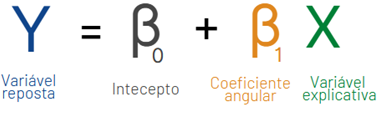

In [ ]:
round(regressor.intercept_ )

In [ ]:
regressor.coef_

In [ ]:
regressor.predict([[38]])

In [ ]:
380-1.8*38

In [ ]:
# Avaliar o desempenho do modelo nos dados de teste
mse = round(mean_squared_error(y_test, previsoes), 2)
r2 = round(r2_score(y_test, previsoes), 2)

# Exibir as métricas
print("MSE:", mse)
print("R²:", r2)

In [ ]:
plt.scatter(df_estudo_1['previsao'], df_estudo_1['erro'])

# Adicione uma linha horizontal em zero para referência
plt.axhline(y=0, color='r', linestyle='--')

# Adicione rótulos aos eixos
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')

# Exiba o gráfico
plt.show()

##Modelo de Regressão Polinomial

###PolynomialFeatures

A função `PolynomialFeatures()` é uma ferramenta do scikit-learn que permite criar recursos polinomiais a partir de um conjunto de recursos existente. Ela transforma um conjunto de recursos de grau n em um conjunto de recursos de grau m, onde m é o grau polinomial desejado.

A matriz `X_poly` terá uma coluna para cada combinação de graus das variáveis independentes. Por exemplo, se tivermos duas variáveis independentes `X1` e `X2` e definirmos `degree=2` ao criar o objeto poly, a matriz `` terá as seguintes colunas:


*   `coluna 1` será a coluna de interceptação, contendo apenas o valor 1 para todos os registros.
*   `coluna 2` será a coluna original X1
* `coluna 3` será a coluna original X2.
* `coluna 4` será o produto das colunas X1 e X2.
* `coluna 5` será o quadrado da coluna X1.
* `coluna 6` será o quadrado da coluna X2.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)

In [ ]:
X_train = X_train.reshape(-1, 1)

X_train_poli = poly.fit_transform(X_train)

X_train_poli

In [ ]:
X_test

In [ ]:
X_test_ = X_test.reshape(-1, 1)

X_test_poli = poly.fit_transform(X_test_)

In [ ]:
X_train_poli = poly.fit_transform(X_train)

X_train_poli

In [ ]:
reg_poli = regressor.fit(X_train_poli, y_train)

reg_poli

In [ ]:
previsoes_poly = regressor.predict(X_test_poli)

previsoes_poly

In [ ]:
df_estudo_1['previsao_poly'] = reg_poli.predict(X_demanda)

df_estudo_1['erro_poly'] = abs(df_estudo_1['previsao_poly'] - df_estudo_1['demanda'])

df_estudo_1 = df_estudo_1.round()

df_estudo_1

In [ ]:
X_poli = poly.fit_transform(X_demanda)

X_poli

In [ ]:
df_estudo_1['previsao_poly'] = reg_poli.predict(X_poli)

df_estudo_1['erro_poly'] = abs(df_estudo_1['previsao_poly'] - df_estudo_1['demanda'])

df_estudo_1 = df_estudo_1.round()

df_estudo_1

In [ ]:
grafico = px.scatter(x = df_estudo_1['preco'], y = df_estudo_1['demanda'])
grafico.add_scatter(x = df_estudo_1['preco'], y = df_estudo_1['previsao_poly'], name = 'Regressão Polinomial')
grafico.show()

In [ ]:
plt.scatter(df_estudo_1['previsao_poly'], df_estudo_1['erro_poly'])

# Adicione uma linha horizontal em zero para referência
plt.axhline(y=0, color='r', linestyle='--')

# Adicione rótulos aos eixos
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')

# Exiba o gráfico
plt.show()

In [ ]:
# Calcule as métricas de avaliação
mae = round( mean_absolute_error(df_estudo_1['demanda'], df_estudo_1['previsao_poly']), 2)
mse = round(mean_squared_error(df_estudo_1['demanda'], df_estudo_1['previsao_poly']), 2)
rmse = round(np.sqrt(mse), 2)
r2 = round(r2_score(df_estudo_1['demanda'], df_estudo_1['previsao_poly']), 3)

# Exiba as métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

#Estudo de caso 2

##Gráfico de dispersão

In [ ]:
plt.scatter( df_estudo_2['preco'],df_estudo_2['demanda'], label='Demanda')
plt.scatter( df_estudo_2['preco'],df_estudo_2['Publicidade'], label='Publicidade')
plt.scatter(df_estudo_2['preco'], df_estudo_2['Competidores'],  label='Competidores')
plt.xlabel('Variáveis')
plt.ylabel('Preço')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

##Analisando correlação

In [ ]:
correlacao_2 = df_estudo_2.corr()

correlacao_2

##Determinando o melhor ajuste

In [ ]:
# Separando as variáveis independentes (demanda, Publicidade e Competidores) e a variável dependente (preco)
X = df_estudo_2[['demanda', 'Publicidade', 'Competidores']]
y = df_estudo_2['preco']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtendo os coeficientes e o intercepto da reta ajustada
coeficientes = modelo.coef_
intercepto = modelo.intercept_

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Calcule o erro médio quadrático (MSE)
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred),2)

# Exibir as métricas
print("MSE:", mse)
print("R²:", r2)

In [ ]:
# Criando a função da reta ajustada
reta = lambda x: coeficientes[0]*x[0] + coeficientes[1]*x[1] + coeficientes[2]*x[2] + intercepto

# Plotando o gráfico de dispersão e a reta ajustada
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_estudo_2['demanda'], df_estudo_2['Publicidade'], df_estudo_2['Competidores'], c='blue', label='Dados')
ax.set_xlabel('Demanda')
ax.set_ylabel('Publicidade')
ax.set_zlabel('Competidores')
ax.set_title('Gráfico de Dispersão e Reta Ajustada')
ax.plot_trisurf(df_estudo_2['demanda'], df_estudo_2['Publicidade'], df_estudo_2['Competidores'], reta([df_estudo_2['demanda'], df_estudo_2['Publicidade'], df_estudo_2['Competidores']]), color='red', alpha=0.5, label='Reta Ajustada')
plt.show()